# Predicting blood culture outcomes in the emergency department of a US-based hospital
For the final project of the DTSA-5509: Introduction to Machine Learning: Supervised Learning course, we need to identify a supervised machine learning problem, perform EDA, and a model analysis. In my daily work as a phycisian-researcher, I try to optimize the use of diagnostic testing for infectious diseases. This final project combines those fields.

In emergency departments (EDs), physicians tend to order blood culture tests for most patients suspected of having an infection. A blood culture can detect a bacterium circulating in the bloodstream, which is a severe, but treatable condition. Since physicians are affraid of missing these infections, blood cultres are ordered even in patients with a very low risk of having such a bacterial bloodstream infection. Therefore, the yield of this diagnostic test is only about 5%, of which about 50% can be contaminated. Not only are we wasting precious resources through this practice, the patients with contaminated cultures usually undergo additional diagnostic testing, receive unnecessary treatments with antibiotics, and have a prolonged hospital stay. 

With this project, I aim to create a prediction model to try and estimate the chance that a certain blood culture will be positive. Instead of waiting 24-72 hours for blood culture results, the physicians could use this prediction model to estimate the risk of a positive blood culture, and withhold testing in low risk patients. This could potentially save costs and harmful effects of false positive (contaminated) cultures that should not have been performed in the first place.

For this project, I will use data that is available to all researchers through the MIMIC-IV-ED dataset (https://physionet.org/content/mimic-iv-ed/2.0/). This dataset contains anonymized data on all patients who stayed in the ED of the Beth Israel Deaconess Medical Center in Boston between 2011-2019. For this project, I downloaded a subset of patients in whom a blood culture analysis was performed during their ED visit. I used the following parameters: age, sex, laboratory results, and vital sign measurements, all collected during the ED stay. The dataset also contained a column with the "outcome" of the blood culture, which is 0 when turned out to be negative, and 1 when it turned out to be positive.



## Importing the data
Let's start by importing the data from a csv file and having a quick glance at the information.

In [150]:
import pandas as pd
pd.set_option("display.max_columns", None)
dataset = pd.read_csv("/Users/michielschinkel/Library/CloudStorage/OneDrive-Personal/Documenten/MS-DS/Supervised Machine Learning/Final project/MIMIC.csv")                                 
dataset.describe()

,outcome,Age,Sex,Alkaline_phosphatase,Basophils,Bilirubin,Creatinine,CRP,Eosinophils,Gamma_GT,Glucose,Hemoglobin,Hematocrit,Leukocytes,Lymfocytes,Monocytes,Neutrophils,Potassium,Sodium,Thrombocytes,Urea,Heartrate,Systolic_blood_pressure,Diastolic_blood_pressure,Temperature,Respiratory_rate,Saturation
count,27706.000000,27706.000000,27706.000000,12883.000000,13439.000000,12611.000000,26356.000000,2064.000000,12413.000000,123.000000,26381.000000,25301.000000,25256.000000,25165.000000,15111.000000,15126.000000,15208.000000,26324.000000,26357.000000,25181.000000,26280.000000,27698.000000,27681.000000,27547.000000,26830.000000,27672.000000,27294.000000
mean,0.054356,60.143326,0.508013,139.934888,0.042768,24.731326,133.233087,73.607892,0.164858,295.504065,7.736997,6.964217,0.345257,10.474578,1.437572,0.805779,8.000753,4.342884,137.323007,237.569787,4.242636,86.093240,126.797158,70.354359,36.930090,18.355850,97.520184
std,0.226724,17.515691,0.499945,153.770408,0.080180,54.550501,153.717223,76.255879,0.392091,473.891206,4.654847,1.423906,0.065358,6.018630,1.105829,0.593879,5.468961,0.823697,5.123344,122.286517,3.597638,16.458938,20.155770,13.055986,0.586387,2.944234,2.352909
min,0.000000,18.000000,0.000000,12.000000,0.003333,2.565000,17.680000,0.100000,0.002500,5.000000,1.387500,1.512713,0.083000,0.100000,0.020000,0.010000,0.005000,2.000000,102.000000,5.000000,0.582750,16.000000,54.500000,40.000000,28.074074,8.000000,16.000000
25%,0.000000,49.000000,0.000000,71.000000,0.020000,5.130000,61.880000,11.000000,0.040000,45.500000,5.309500,5.957760,0.300000,6.600000,0.770000,0.490000,4.340000,3.800000,135.000000,160.000000,1.998000,74.333333,112.333300,61.500000,36.611111,16.600000,96.471362
50%,0.000000,61.000000,1.000000,96.000000,0.030000,10.260000,88.400000,47.700000,0.100000,133.000000,6.271500,7.012780,0.349000,9.250000,1.240000,0.710000,6.730000,4.200000,138.000000,222.000000,2.997000,84.666667,125.000000,69.666667,36.822222,17.750000,98.000000
75%,0.000000,73.000000,1.000000,144.000000,0.050000,18.810000,132.600000,112.750000,0.200000,314.000000,8.241750,7.943680,0.391000,12.900000,1.862500,0.990000,10.200000,4.700000,140.000000,293.000000,4.995000,96.428570,139.000000,78.000000,37.138889,19.200000,99.000000
max,1.000000,91.000000,1.000000,2416.000000,4.070000,908.010000,2042.040000,586.200000,21.740000,3714.000000,91.658250,12.412000,0.649000,59.700000,21.740000,14.450000,59.960000,10.000000,180.000000,1296.000000,43.456500,183.500000,233.750000,248.250000,42.331250,48.800000,100.000000


It seems that we have over 27000 patient visits to work with. Some of the columns have missing data, let's have a closer look at the percentages of data missing in the various columns:

In [151]:
#Percentage of imputed values
percent_na = ((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2).sort_values(ascending=False)
values = percent_na.head(24)
percent_imputed = values[0].mean()

#Create dataframe
missing_dataframe = pd.DataFrame()
missing_dataframe["Percentage missing"] = values
missing_dataframe.loc["Total percentage imputed"] = missing_dataframe.mean().round(2)
missing_dataframe

,Percentage missing
Gamma_GT,99.56
CRP,92.55
Eosinophils,55.20
Bilirubin,54.48
Alkaline_phosphatase,53.50
Basophils,51.49
Lymfocytes,45.46
Monocytes,45.41
Neutrophils,45.11
Leukocytes,9.17


We can see that most of the features are available for at least half of the patients, which is a pretty high percentage for the nature of this data. However, Gamma_GT and CRP laboratory values are missing for most patients. Given these high numbers of missing values, we will drop these columns from the dataframe.

In [152]:
dataset.drop(["Gamma_GT", "CRP"], 1, inplace=True)  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   27706 non-null  int64  
 1   Age                       27706 non-null  int64  
 2   Sex                       27706 non-null  int64  
 3   Alkaline_phosphatase      12883 non-null  float64
 4   Basophils                 13439 non-null  float64
 5   Bilirubin                 12611 non-null  float64
 6   Creatinine                26356 non-null  float64
 7   Eosinophils               12413 non-null  float64
 8   Glucose                   26381 non-null  float64
 9   Hemoglobin                25301 non-null  float64
 10  Hematocrit                25256 non-null  float64
 11  Leukocytes                25165 non-null  float64
 12  Lymfocytes                15111 non-null  float64
 13  Monocytes                 15126 non-null  float64
 14  Neutro

/var/folders/pf/j_1jwxsx3lzdvxnvj30kd2hw0000gn/T/ipykernel_38398/671855512.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(["Gamma_GT", "CRP"], 1, inplace=True)


## Splitting the dataset
We are now ready to create the training and testing sets for our future model development. We will first select the features from the outcome, and then create a train/test split. We will use 80% of the data to train our model. We will leave the other 20% of the data aside until the end, to validate our predictions on.

In [153]:
import numpy as np
from sklearn.model_selection import train_test_split

X = dataset.loc[:, dataset.columns != "outcome"]
y = dataset.loc[:, dataset.columns == "outcome"].values.ravel()
y = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

## Setting up a pipeline for imputation
Since a substantial amount of columns have missing data, we will need to impute those fields to be able to use some of the model procedures. We therefore create a pipeline that imputes the data using medians (using the SimpleImputer) and then instantiates a model. There are more intricate ways work with this missing data, but for this problem, we will keep it simple and focus on the modelling procedure.

For this analysis we will train and analyze both a RandomForest and an eXtreme Gradient Boosting decision tree model. These are appropriate models for the type of data we work with, and are usually among the top performers for this type of problem.

In [154]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Instantiate the imputer, scaler and various supervised machine learning algorithms
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
xgb = XGBClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)

#Set up the pipeline steps
steps_xgb = [("imputation", imputer),
            ("XGBoost", xgb)]

steps_rf = [("imputation", imputer),
            ("RF", rf)]

#Create the pipleine
pipeline_xgb = Pipeline(steps_xgb)
pipeline_rf = Pipeline(steps_rf)

## Setting up cross validation with hyperparameter gridsearch

Now that we have set up the pipeline, we are going to create a cross validation with hyperparameter search for both models. We use a stratified 5-fold cross validation on the training data, so that the model is trained multiple times on various parts of the data, and tested on another part of the training set. During the proces, we will perform a fairly extensive grid search to find the optimal hyperparameters for our models 

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
param_grid_xgb = {
    "XGBoost__learning_rate":[0.01, 0.05, 0.1],
    "XGBoost__min_child_weight":[1, 2, 3],
    "XGBoost__max_depth":[3, 5, 7],
    "XGBoost__subsample":[0.8, 1],
    "XGBoost__colsample_bytree":[0.8, 1]
}

param_grid_rf = {
    "RF__min_samples_leaf":[1, 2, 3],
    "RF__min_samples_split":[2, 4, 6],
    "RF__max_depth":[3, 5, 7],
    "RF__criterion":["gini", "entropy", "log_loss"],
}



cv_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=crossval, n_jobs=-1)
cv_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=crossval, n_jobs=-1)

## Running cross validation search for optimal hyperparameters
Below, we fit the gridsearch objects to the data and find the optimal models for both the RandomForest and XGBoost. We output the final parameters for the optimized model.

In [156]:
cv_xgb.fit(X_train, y_train)
cv_rf.fit(X_train, y_train)
model_xgb = cv_xgb.best_estimator_
model_rf = cv_rf.best_estimator_
print(cv_xgb.best_params_)
print(cv_rf.best_params_)

{'XGBoost__colsample_bytree': 0.8, 'XGBoost__learning_rate': 0.05, 'XGBoost__max_depth': 5, 'XGBoost__min_child_weight': 1, 'XGBoost__subsample': 0.8}
{'RF__criterion': 'gini', 'RF__max_depth': 3, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}


## Testing the predictions: the AUC
Now that we have our optimized models, we are going to look at the performance of the models in both the training and testing data. We first start with a look at the Area Under the Curve (AUC).

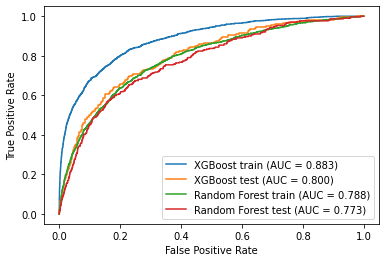

In [157]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

#predicted probabilities
xgb_probs_test = model_xgb.predict_proba(X_test)[:, 1]
rf_probs_test = model_rf.predict_proba(X_test)[:, 1]
xgb_probs_train = model_xgb.predict_proba(X_train)[:, 1]
rf_probs_train = model_rf.predict_proba(X_train)[:, 1]

#AUC scores
xgb_auc_test = roc_auc_score(y_test, xgb_probs_test)
rf_auc_test = roc_auc_score(y_test, rf_probs_test)
xgb_auc_train = roc_auc_score(y_train, xgb_probs_train)
rf_auc_train = roc_auc_score(y_train, rf_probs_train)

#ROC curves
xgb_fpr_test, xgb_tpr_test, _ = roc_curve(y_test, xgb_probs_test)
rf_fpr_test, rf_tpr_test, _ = roc_curve(y_test, rf_probs_test)
xgb_fpr_train, xgb_tpr_train, _ = roc_curve(y_train, xgb_probs_train)
rf_fpr_train, rf_tpr_train, _ = roc_curve(y_train, rf_probs_train)

#Plotting the overarching precision recall curves
plt.plot(xgb_fpr_train, xgb_tpr_train, label=("XGBoost train (AUC = %.3f)" % (xgb_auc_train)))
plt.plot(xgb_fpr_test, xgb_tpr_test, label=("XGBoost test (AUC = %.3f)" % (xgb_auc_test)))
plt.plot(rf_fpr_train, rf_tpr_train, label=("Random Forest train (AUC = %.3f)" % (rf_auc_train)))
plt.plot(rf_fpr_test, rf_tpr_test, label=("Random Forest test (AUC = %.3f)" % (rf_auc_test)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



We notice that the training scores are higher than the AUCs in the hold-out test set. However, the difference is far less for the RandomForest than with the XGBoost model. There seems to be some overfitting happening with the XGBoost model. Nevertheless, the AUC of the XGBoost model is higher than the RandomForest AUC in both the train and test sets, indicating that this may be the best model to use here.

## Further exploration: the AUPRC
To better understand the model performance and clinical value, we also create a similar plot for the Area Under the Precision Recall Curve.

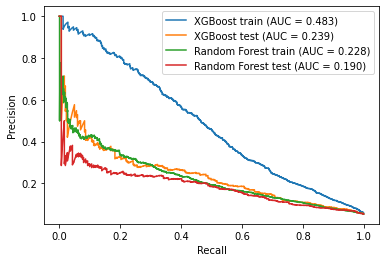

In [158]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from pandas import DataFrame

#predicted probabilities
xgb_probs_test = model_xgb.predict_proba(X_test)[:, 1]
rf_probs_test = model_rf.predict_proba(X_test)[:, 1]
xgb_probs_train = model_xgb.predict_proba(X_train)[:, 1]
rf_probs_train = model_rf.predict_proba(X_train)[:, 1]

#PR curves
xgb_precision_train, xgb_recall_train, _ = precision_recall_curve(y_train, xgb_probs_train)
rf_precision_train, rf_recall_train, _ = precision_recall_curve(y_train, rf_probs_train)
xgb_precision_test, xgb_recall_test, _ = precision_recall_curve(y_test, xgb_probs_test)
rf_precision_test, rf_recall_test, _ = precision_recall_curve(y_test, rf_probs_test)

#AUPRC scores 
xgb_auprc_train = average_precision_score(y_train, xgb_probs_train)
rf_auprc_train = average_precision_score(y_train, rf_probs_train)
xgb_auprc_test = average_precision_score(y_test, xgb_probs_test)
rf_auprc_test = average_precision_score(y_test, rf_probs_test)


#Plotting the overarching precision recall curves
plt.plot(xgb_recall_train, xgb_precision_train, label=("XGBoost train (AUC = %.3f)" % (xgb_auprc_train)))
plt.plot(xgb_recall_test, xgb_precision_test, label=("XGBoost test (AUC = %.3f)" % (xgb_auprc_test)))
plt.plot(rf_recall_train, rf_precision_train, label=("Random Forest train (AUC = %.3f)" % (rf_auprc_train)))
plt.plot(rf_recall_test, rf_precision_test, label=("Random Forest test (AUC = %.3f)" % (rf_auprc_test)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()



In this figure, we see similar patterns to the AUC. The XGBoost does much better on the training set, but drops quite a bit in the test set. Still it is higher than the RandomForest values in both cases. We can appreciate that if we want to have a fairly high recall/sensitivity (which we want, since we do not want to miss positive blood cultures), we do have to accept a fairly low precision of about 0.2. This means that even with the model, the yield of our blood cultures could only increase to about 20%. Still, that is much better than the current standard of around 5%. 

## A final insight: the Calibration Curve
As a final exploration of the model performance, we will take a look at the calibration curve. This will show if the predicted probabilities by the models, on average in the test set, are close to the true probabilities of positive blood cultures in the test set. In other words: if our model predicts a 20% chance of a positive blood culture, then we expect 1/5 patients with such a prediction to have a positive blood culture result.

/Users/michielschinkel/Library/Python/3.8/lib/python/site-packages/sklearn/calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


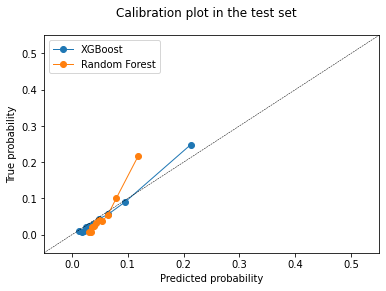

In [159]:
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

#Calibration curve
xgb_y, xgb_x = calibration_curve(y_test, xgb_probs_test, n_bins=10, normalize=False, strategy="quantile")
rf_y, rf_x = calibration_curve(y_test, rf_probs_test, n_bins=10, normalize=False, strategy="quantile")

fig, ax = plt.subplots()
plt.plot(xgb_x, xgb_y, marker="o", linewidth=1, label="XGBoost")
plt.plot(rf_x, rf_y, marker="o", linewidth=1, label="Random Forest")
line = mlines.Line2D([0,1], [0,1], color="black",  linewidth=0.5, linestyle="--")
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle("Calibration plot in the test set")
ax.set_xlabel("Predicted probability")
ax.set_ylabel("True probability")
ax.set(xlim=[-0.05, 0.55], ylim=[-0.05, 0.55])
plt.legend()
plt.show()

We can learn various interesting things from this plot. First of all, the XGBoost predictions, especially on the higher end of the spectrum, are much closer to the ideal diagonal line where the predicted and actual probabilities match. Furthermore, we can appreciate that most of the probabilities are really low. Even the 10% highest probabilities are only just above 20%. This means that is extremely hard to find patients with a very high chance of a positive blood culture.

# Discussions and conclusion

For this final project in the DTSA-5509 course, I have created two supervised machine learning models to predict the outcomes of blood cultures in the Emergency Department. If we use the model to withhold testing in very low risk patients, we may be able to reduce costs, antibiotic treatments, and hospital length-of-stay. We used data from the Beth Israel Deaconess Medical Center in Boston and used regular laboratory values and vitals sign measurements that would be available in the ED for most patients. Through a hyperparameter grid search and cross validation, we were able to create two prediction models that reached AUCs of around 0.80 in the hold out test sets, which is a very decent performance for medical prediction models.

The XGBoost model seems to outperform the RandomForest model in all performance categories, and may be the preferred model for a clinical implementation. However, we have seem that the performance drops between the training and testing phases were much larger for the XGBoost model than for the RandomForest, indicating that there may more overfitting in the XGBoost model. Future developments of this particular model should focus on reducing the overfitting, perhaps by limiting grid_search parameters such as max_depth, while also taking smaller subsamples and columns per cross validation round.

In conclusion, I have learned many new aspects of supervised machine learning through this course. I have integrated many of these new aspects into the blood culture prediction model in this project and have a better understanding of why certain phenomena (such as the drop in performance between train/test) can be tackled. I look forward to learning even more in this space.